<a href="https://colab.research.google.com/github/Jaseko1989/ClassificationProject/blob/main/Classification_Project_OA5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div style="font-size: 30px">
<font color='blue'> <b>From Headlines to Insights: A Machine Learning Journey in News Classification</b></font>

![announcement-article-articles-copy-coverage](announcement-article-articles-copy-coverage.jpg)

## Table of Contents
*  [ Project Overview](#chapter1)
    *  [1.1 Introduction](#section1_1)
    *  [1.2 Objectives](#section1_2)
*  [ Importing Packages](#chapter2)
*  [ Loading Data](#chapter3)
*  [ Data Cleaning](#chapter4)
*  [ Exploratory data analysis (EDA)](#chapter5)
*  [ Model Training and Evaluation](#chapter6)
*  [ Model parameters & hyperparameters tunning](#chapter7)
*  [ Conclusion](#chapter8)



## Project Overview <a id="chapter1"><a>

#### 1.1 Introduction <a id="section1_1"></a>

In the digital age, the volume of news consumed has skyrocketed, resulting in a vast amount of information for readers to navigate. To assist readers in finding relevant news, we plan to develop a model that categorizes news articles by subject. This will improve content organization and accessibility for users.

By leveraging machine learning and natural language processing (NLP), this project aims to create robust models that automatically classify news articles based on their content. This will enhance content categorization, operational efficiency, and user experience, which are vital for news outlets. Eventually, these models will be transformed into an app for the benefit of news outlets and their readers.

#### Aim<a id="section1_1"></a>
The main goal of this project is to create and implement an automated system for classifying news articles using machine learning techniques. This system will accurately sort articles into predefined categories, enhancing content organization, operational efficiency, and reader satisfaction for the news outlet.

#### 1.2 Objectives<a id="section1_2"></a>
Accurate Classification: Develop a model to correctly categorize news articles into predefined categories such as Business, Technology, Sports, Education, and Entertainment.

Content Organization: Streamline content management and retrieval to make news more accessible and relevant to users.

Reader Satisfaction: Improve user experience by helping readers quickly find news that interests them.

Operational Efficiency: Automate the categorization process to reduce the editorial team's workload, allowing them to focus on content creation and curation.

App Deployment: Convert the model into a user-friendly app for news outlets and readers to benefit from automated article classification.

## Importing Packages <a id="chapter2"><a>

<div class="alert alert-block alert-info">
<b>Importing Packages</b> Importing packages is crucial in data analysis and machine learning projects as it provides access to essential libraries and tools. Python's rich ecosystem includes pandas for data manipulation, matplotlib and seaborn for visualization, scikit-learn for machine learning, and numpy for numerical computations. Starting your analysis by importing the right packages ensures you have the necessary tools for effective data exploration and analysis.
</di>


In [ ]:
# Libraries for data loading, data manipulation and data visulisation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import nltk
import string
import re
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

from tabulate import tabulate
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

# Libraries for Handing Errors
import warnings
warnings.filterwarnings('ignore')

## Loading data <a id="chapter3"><a>

<div class="alert alert-block alert-info">
<b>Loading Data</b> is the initial step in the data analysis process, involving the retrieval and loading of data into a suitable format for analysis. This step is crucial as it sets the foundation for the entire analysis process. The data can be loaded from various sources such as CSV files, databases, or APIs. It is essential to ensure that the data is loaded correctly and that any initial preprocessing steps, such as handling missing values or encoding categorical variables, are performed accurately to prepare the data for further analysis.
</di>


In [ ]:
# Load the data
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first 5 rows of each dataset
print("First 5 rows of train_data:")
print(train_data.head())

print("\nFirst 5 rows of test_data:")
print(test_data.head())

First 5 rows of train_data:
                                           headlines  \
0  RBI revises definition of politically-exposed ...   
1  NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...   
2  Akasa Air ‘well capitalised’, can grow much fa...   
3  India’s current account deficit declines sharp...   
4  States borrowing cost soars to 7.68%, highest ...   

                                         description  \
0  The central bank has also asked chairpersons a...   
1  NDTV's consolidated revenue from operations wa...   
2  The initial share sale will be open for public...   
3  The current account deficit (CAD) was 3.8 per ...   
4  The prices shot up reflecting the overall high...   

                                             content  \
0  The Reserve Bank of India (RBI) has changed th...   
1  Broadcaster New Delhi Television Ltd on Monday...   
2  Homegrown server maker Netweb Technologies Ind...   
3  India’s current account deficit declined sharp...   
4  States have bee

## Data Cleaning <a id="chapter4"><a>

<div class="alert alert-block alert-success">
  <b>Data cleaning</b> A crucial step in data analysis is cleaning the dataset by correcting or removing incorrect, corrupted, duplicate, or incomplete data. Techniques such as filling missing values, removing outliers, and standardizing data formats ensure accuracy and reliability for subsequent analyses and decision-making.
</div

In [ ]:
# Get the shape of the train_data DataFrame
print('The shape of the train_data:', train_data.shape)

# Get the shape of the test_data DataFrame
print('The shape of the test_data:', test_data.shape)

The shape of the train_data: (5520, 5)
The shape of the test_data: (2000, 5)


- Exploring the shape of the train_data and the test_data

In [ ]:
# Display summary information about the train_data and test_data
print(train_data.info(), test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5520 entries, 0 to 5519
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    5520 non-null   object
 1   description  5520 non-null   object
 2   content      5520 non-null   object
 3   url          5520 non-null   object
 4   category     5520 non-null   object
dtypes: object(5)
memory usage: 215.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   headlines    2000 non-null   object
 1   description  2000 non-null   object
 2   content      2000 non-null   object
 3   url          2000 non-null   object
 4   category     2000 non-null   object
dtypes: object(5)
memory usage: 78.2+ KB
None None


- Displaying summary information about the train_data and the test_data

In [ ]:
# counting Null value
def check_null_values(train_data):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    has_nulls = False
    for column in train_data:
        null_count = train_data[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')
            has_nulls = True

    if not has_nulls:
        print('There are no null values in the train_data')

# Printing null value count
check_null_values(train_data)


There are no null values in the train_data


In [ ]:
# counting Null value
def check_null_values(test_data):
    """
    Print the count of null values for each column in a DataFrame.

    This function iterates through each column in the DataFrame to check for the presence of null values.
    If a column contains null values, it prints the column name along with the number of null values.

    Parameters:
    df (DataFrame): The pandas DataFrame to check for null values.

    Returns:
    None: This function does not return a value; it only prints information.
    """
    has_nulls = False
    for column in test_data:
        null_count = test_data[column].isnull().sum()
        if null_count > 0:
            print(f'{column} has {null_count} null values')
            has_nulls = True

    if not has_nulls:
        print('There are no null values in the test_data')

# Printing null value count
check_null_values(test_data)


There are no null values in the test_data


In [ ]:
# counting duplicate rows
def count_duplicate_rows(train_data):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    test_data (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = train_data.duplicated().sum()
    return duplicate_count

# printing duplicate rows count
duplicate_count = count_duplicate_rows(train_data)
print(f"The number of duplicate rows in the train_data: {duplicate_count}")


The number of duplicate rows in the train_data: 0


In [ ]:
# counting duplicate rows
def count_duplicate_rows(test_data):
    """
    Count the number of duplicate rows in a DataFrame.

    This function calculates the total number of duplicate rows in the DataFrame by calling the `duplicated` method,
    which marks duplicates as `True`, and then sums these cases.

    Parameters:
    test_data (pandas.DataFrame): The DataFrame to check for duplicates.

    Returns:
    int: The count of duplicate rows.
    """
    duplicate_count = test_data.duplicated().sum()
    return duplicate_count

# printing duplicate rows count
duplicate_count = count_duplicate_rows(test_data)
print(f"The number of duplicate rows in the test_data: {duplicate_count}")


The number of duplicate rows in the test_data: 0


## Observations

1. **Data Shape:**

- The `train_data` has 5520 rows and 5 columns.
- The `test_data` has 2000 rows and 5 columns.
2. **Data Types:**

- All columns have the correct data type, specifically 'object' types.
3. **Null Values:**

- There are no null values in either `train_data` or `test_data`.
4. **Duplicates:**

- There are no duplicate rows in either dataset.


## PREPROCESSING

##### 4.1 Understanding the data

In [ ]:
# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
# Combine Headlines, Description, and Content into a single feature
train_data['text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['content']
test_data['text'] = test_data['headlines'] + ' ' + test_data['description'] + ' ' + test_data['content']

#Read the entire first line in message column
print(train_data.loc[0, 'text'])
print(test_data.loc[0, 'text'])

RBI revises definition of politically-exposed persons for KYC purpose The central bank has also asked chairpersons and chief executives of banks and other financial services, which are into lending business, to make the changes effective immediately. The Reserve Bank of India (RBI) has changed the definition of Politically-Exposed Persons (PEPs) under its norms, a move that will make it easier for those individuals to carry out various banking transactions, including availing loans.
Certain changes have been made in the RBI’s Know Your Customer (KYC) norms.
The earlier norms pertaining to PEPs were open-ended and there was a lack of clarity on the definition, apparently leading to issues for bankers, parliamentarians and others. There were also concerns in certain quarters that PEPs were finding it difficult to get loans or open bank accounts.
ADVERTISEMENT
In the amended KYC master direction, the central bank defines PEPs as “individuals who are or have been entrusted with prominent p

##### 4.2 Changing text to lower case

In [ ]:
#make text to lower case
train_data['text'] = train_data['text'].str.lower()
test_data['text'] = test_data['text'].str.lower()

##### 4.3 Removing punctuations

In [ ]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])

train_data['text'] = train_data['text'].apply(remove_punctuation)
train_data['text']

0       rbi revises definition of politicallyexposed p...
1       ndtv q2 net profit falls 574 to rs 555 crore i...
2       akasa air ‘well capitalised’ can grow much fas...
3       india’s current account deficit declines sharp...
4       states borrowing cost soars to 768 highest so ...
                              ...                        
5515    samsung sends out invites for ‘unpacked 2024’ ...
5516    google pixel 8 pro accidentally appears on off...
5517    amazon ad on google search redirects users to ...
5518    elon musk’s x previously twitter now worth les...
5519    apple’s ios 172 update released and here’s how...
Name: text, Length: 5520, dtype: object

In [ ]:
def remove_punctuation(text):
    return ''.join([l for l in text if l not in string.punctuation])
    test_data['text'] = test_data['text'].apply(remove_punctuation)
test_data['text']

0       nlc india wins contract for power supply to ra...
1       sbi clerk prelims exams dates announced; admit...
2       golden globes: michelle yeoh, will ferrell, an...
3       oneplus nord 3 at rs 27,999 as part of new pri...
4       adani family’s partners used ‘opaque’ funds to...
                              ...                        
1995    sri lankan government renews lanka ioc’s petro...
1996    kia launches new seltos with price starting at...
1997    rebel moon movie review: zack snyder’s spectac...
1998    chatgpt most popular ai tool with 14.6 billion...
1999    salaar movie review: prabhas’ violence-riddled...
Name: text, Length: 2000, dtype: object

#### 4.4 Removing stop-words

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

train_data['text'] = train_data['text'].apply(lambda text: remove_stopwords(text))
train_data['text']


0       rbi revises definition politicallyexposed pers...
1       ndtv q2 net profit falls 574 rs 555 crore impa...
2       akasa air ‘well capitalised’ grow much faster ...
3       india’s current account deficit declines sharp...
4       states borrowing cost soars 768 highest far fi...
                              ...                        
5515    samsung sends invites ‘unpacked 2024’ new gala...
5516    google pixel 8 pro accidentally appears offici...
5517    amazon ad google search redirects users micros...
5518    elon musk’s x previously twitter worth less ha...
5519    apple’s ios 172 update released here’s change ...
Name: text, Length: 5520, dtype: object

In [ ]:
STOPWORDS = set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])

test_data['text'] = test_data['text'].apply(lambda text: remove_stopwords(text))
test_data['text']

0       nlc india wins contract power supply rajasthan...
1       sbi clerk prelims exams dates announced; admit...
2       golden globes: michelle yeoh, ferrell, angela ...
3       oneplus nord 3 rs 27,999 part new price cut: h...
4       adani family’s partners used ‘opaque’ funds in...
                              ...                        
1995    sri lankan government renews lanka ioc’s petro...
1996    kia launches new seltos price starting rs 10.8...
1997    rebel moon movie review: zack snyder’s spectac...
1998    chatgpt popular ai tool 14.6 billion visits ye...
1999    salaar movie review: prabhas’ violence-riddled...
Name: text, Length: 2000, dtype: object

##### 4.5 Checking frequent words

In [ ]:
from collections import Counter
cnt = Counter()
for text in train_data["text"].values:
    for word in text.split():
        cnt[word] += 1

cnt.most_common(10)

[('said', 6716),
 ('per', 4744),
 ('india', 4603),
 ('also', 4588),
 ('cent', 3658),
 ('2023', 3548),
 ('rs', 3465),
 ('already', 3280),
 ('new', 3063),
 ('advertisement', 3027)]

##### 4.6 Tokenisation

In [ ]:
# Tokenize text using TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
train_data["text"] = train_data["text"].apply(tokenizer.tokenize)

# Display the tokenized text
print(train_data["text"])

0       [rbi, revises, definition, politicallyexposed,...
1       [ndtv, q2, net, profit, falls, 574, rs, 555, c...
2       [akasa, air, ‘well, capitalised’, grow, much, ...
3       [india’s, current, account, deficit, declines,...
4       [states, borrowing, cost, soars, 768, highest,...
                              ...                        
5515    [samsung, sends, invites, ‘unpacked, 2024’, ne...
5516    [google, pixel, 8, pro, accidentally, appears,...
5517    [amazon, ad, google, search, redirects, users,...
5518    [elon, musk’s, x, previously, twitter, worth, ...
5519    [apple’s, ios, 172, update, released, here’s, ...
Name: text, Length: 5520, dtype: object


In [ ]:
# Tokenize text using TreebankWordTokenizer
tokenizer = TreebankWordTokenizer()
test_data["text"] = test_data["text"].apply(tokenizer.tokenize)

# Display the tokenized text
print(test_data["text"])

0       [nlc, india, wins, contract, power, supply, ra...
1       [sbi, clerk, prelims, exams, dates, announced,...
2       [golden, globes, :, michelle, yeoh, ,, ferrell...
3       [oneplus, nord, 3, rs, 27,999, part, new, pric...
4       [adani, family’s, partners, used, ‘opaque’, fu...
                              ...                        
1995    [sri, lankan, government, renews, lanka, ioc’s...
1996    [kia, launches, new, seltos, price, starting, ...
1997    [rebel, moon, movie, review, :, zack, snyder’s...
1998    [chatgpt, popular, ai, tool, 14.6, billion, vi...
1999    [salaar, movie, review, :, prabhas’, violence-...
Name: text, Length: 2000, dtype: object


##### 4.7 Lemmatization

In [ ]:
# Lemmatization function
def df_lemma(words, lemmatizer):
    return [lemmatizer.lemmatize(word) for word in words]

# Initialize WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Apply lemmatization to the "text" column
train_data["text"] = train_data["text"].apply(df_lemma, args=(lemmatizer, ))

# Join the lemmatized tokens back into strings
train_data["text"] = train_data["text"].apply(' '.join)

# Display the DataFrame
print(train_data["text"])

0       rbi revise definition politicallyexposed perso...
1       ndtv q2 net profit fall 574 r 555 crore impact...
2       akasa air ‘well capitalised’ grow much faster ...
3       india’s current account deficit decline sharpl...
4       state borrowing cost soar 768 highest far fisc...
                              ...                        
5515    samsung sends invite ‘unpacked 2024’ new galax...
5516    google pixel 8 pro accidentally appears offici...
5517    amazon ad google search redirects user microso...
5518    elon musk’s x previously twitter worth le half...
5519    apple’s io 172 update released here’s change i...
Name: text, Length: 5520, dtype: object


In [ ]:
# Apply lemmatization to the "text" column
test_data['text'] = test_data['text'] .apply(df_lemma, args=(lemmatizer, ))

# Join the lemmatized tokens back into strings
test_data['text'] = test_data['text'].apply(' '.join)

# Display the DataFrame
print(test_data['text'])

0       nlc india win contract power supply rajasthan ...
1       sbi clerk prelim exam date announced ; admit c...
2       golden globe : michelle yeoh , ferrell , angel...
3       oneplus nord 3 r 27,999 part new price cut : h...
4       adani family’s partner used ‘opaque’ fund inve...
                              ...                        
1995    sri lankan government renews lanka ioc’s petro...
1996    kia launch new seltos price starting r 10.89 l...
1997    rebel moon movie review : zack snyder’s specta...
1998    chatgpt popular ai tool 14.6 billion visit yea...
1999    salaar movie review : prabhas’ violence-riddle...
Name: text, Length: 2000, dtype: object


##### 4.9 CountVectorizer

In [ ]:

# Debug: Print some examples of the preprocessed text
print(train_data['text'].head())

# Check for empty strings in the text column
print("Empty strings in train_data:", (train_data['text'] == '').sum())
print("Empty strings in test_data:", (test_data['text'] == '').sum())

# Handle empty strings by filling them with a placeholder
train_data['text'].replace('', 'placeholder', inplace=True)
test_data['text'].replace('', 'placeholder', inplace=True)


0    rbi revise definition politicallyexposed perso...
1    ndtv q2 net profit fall 574 r 555 crore impact...
2    akasa air ‘well capitalised’ grow much faster ...
3    india’s current account deficit decline sharpl...
4    state borrowing cost soar 768 highest far fisc...
Name: text, dtype: object
Empty strings in train_data: 0
Empty strings in test_data: 0


In [ ]:
vect = CountVectorizer()
vect.fit(train_data['text'])

CountVectorizer()

In [ ]:
# include 1-grams and 2-grams
vect = CountVectorizer(ngram_range=(1, 2))

#### 4.10 Encode Category

In [ ]:
# Assuming 'category' is the column containing the categories in your DataFrame
label_encoder = LabelEncoder()
train_data['encoded_category'] = label_encoder.fit_transform(train_data['category'])

# Create a dictionary mapping the original categories to their encoded values
category_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

business: 0
education: 1
entertainment: 2
sports: 3
technology: 4


# Exploratory Data Analysis (EDA) <a id="chapter5"><a>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis (EDA)</b> is essential in data analysis for uncovering patterns, relationships, and data structure. Using techniques like visualizations, summary statistics, and correlation analysis, EDA provides insights and identifies issues. It aids in hypothesis formation, guides further analysis, and informs data preprocessing and modeling decisions.
</di>


In [ ]:
# Count the occurrences of each unique category in the 'category' column of train_data
category_counts = train_data['category'].value_counts()

# Print the counts of each category
print(category_counts)

category
education        1520
technology       1280
business         1120
entertainment     960
sports            640
Name: count, dtype: int64


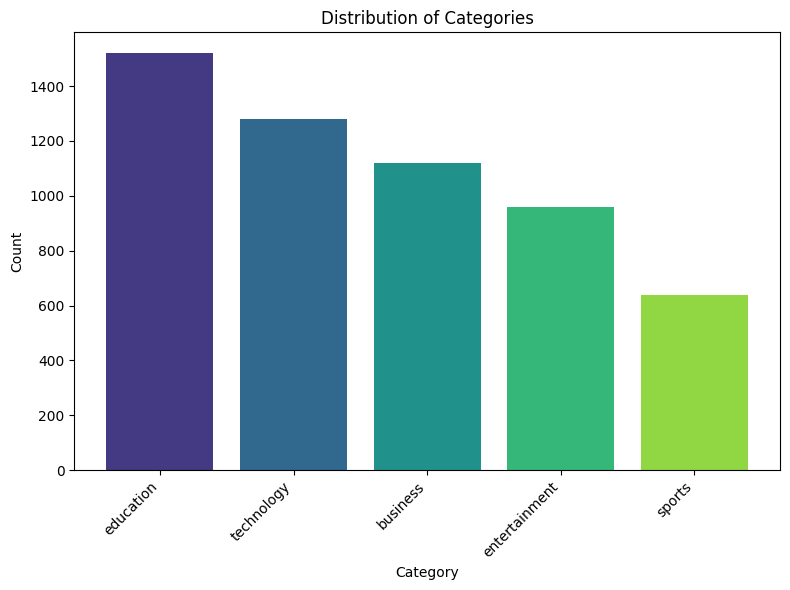

In [ ]:
# Get the 'viridis' color palette with as many colors as there are regions
colors = sns.color_palette("viridis", len(category_counts))

# Plot the total emissions by region using the 'viridis' color palette
plt.figure(figsize=(8, 6))
plt.bar(category_counts.index, category_counts.values, color=colors)
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Distribution of Categories')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

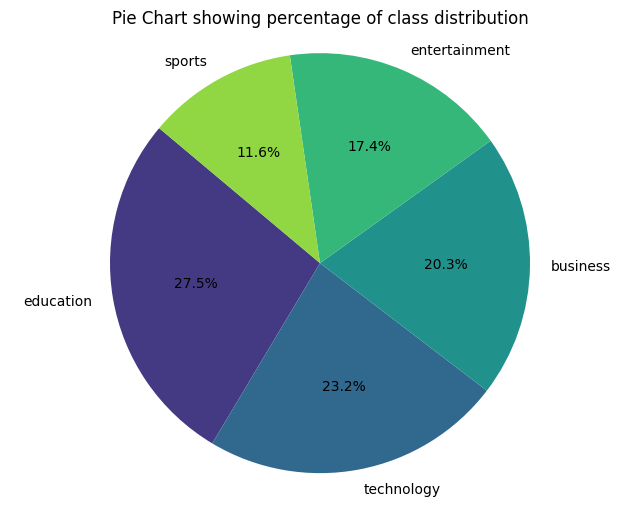

In [ ]:
# Create the pie chart
plt.figure(figsize=(8, 6))

# Get the 'viridis' color palette with as many colors as there are regions
colors = sns.color_palette("viridis", len(category_counts))

# Create the pie chart with the 'viridis' color palette
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Pie Chart showing percentage of class distribution')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Imbalance in the Target Variable

- **Significant Category Imbalances:** The most significant imbalances are in the Education and Sports categories. Education is overrepresented at 27.54%, while Sports is underrepresented at 11.59%.

- **Moderate Overall Imbalance:** The dataset has a moderate imbalance overall. It is not extremely skewed, but the differences in category representation—ranging from 11.59% (Sports) to 27.54% (Education)—are noticeable enough to potentially impact model performance.

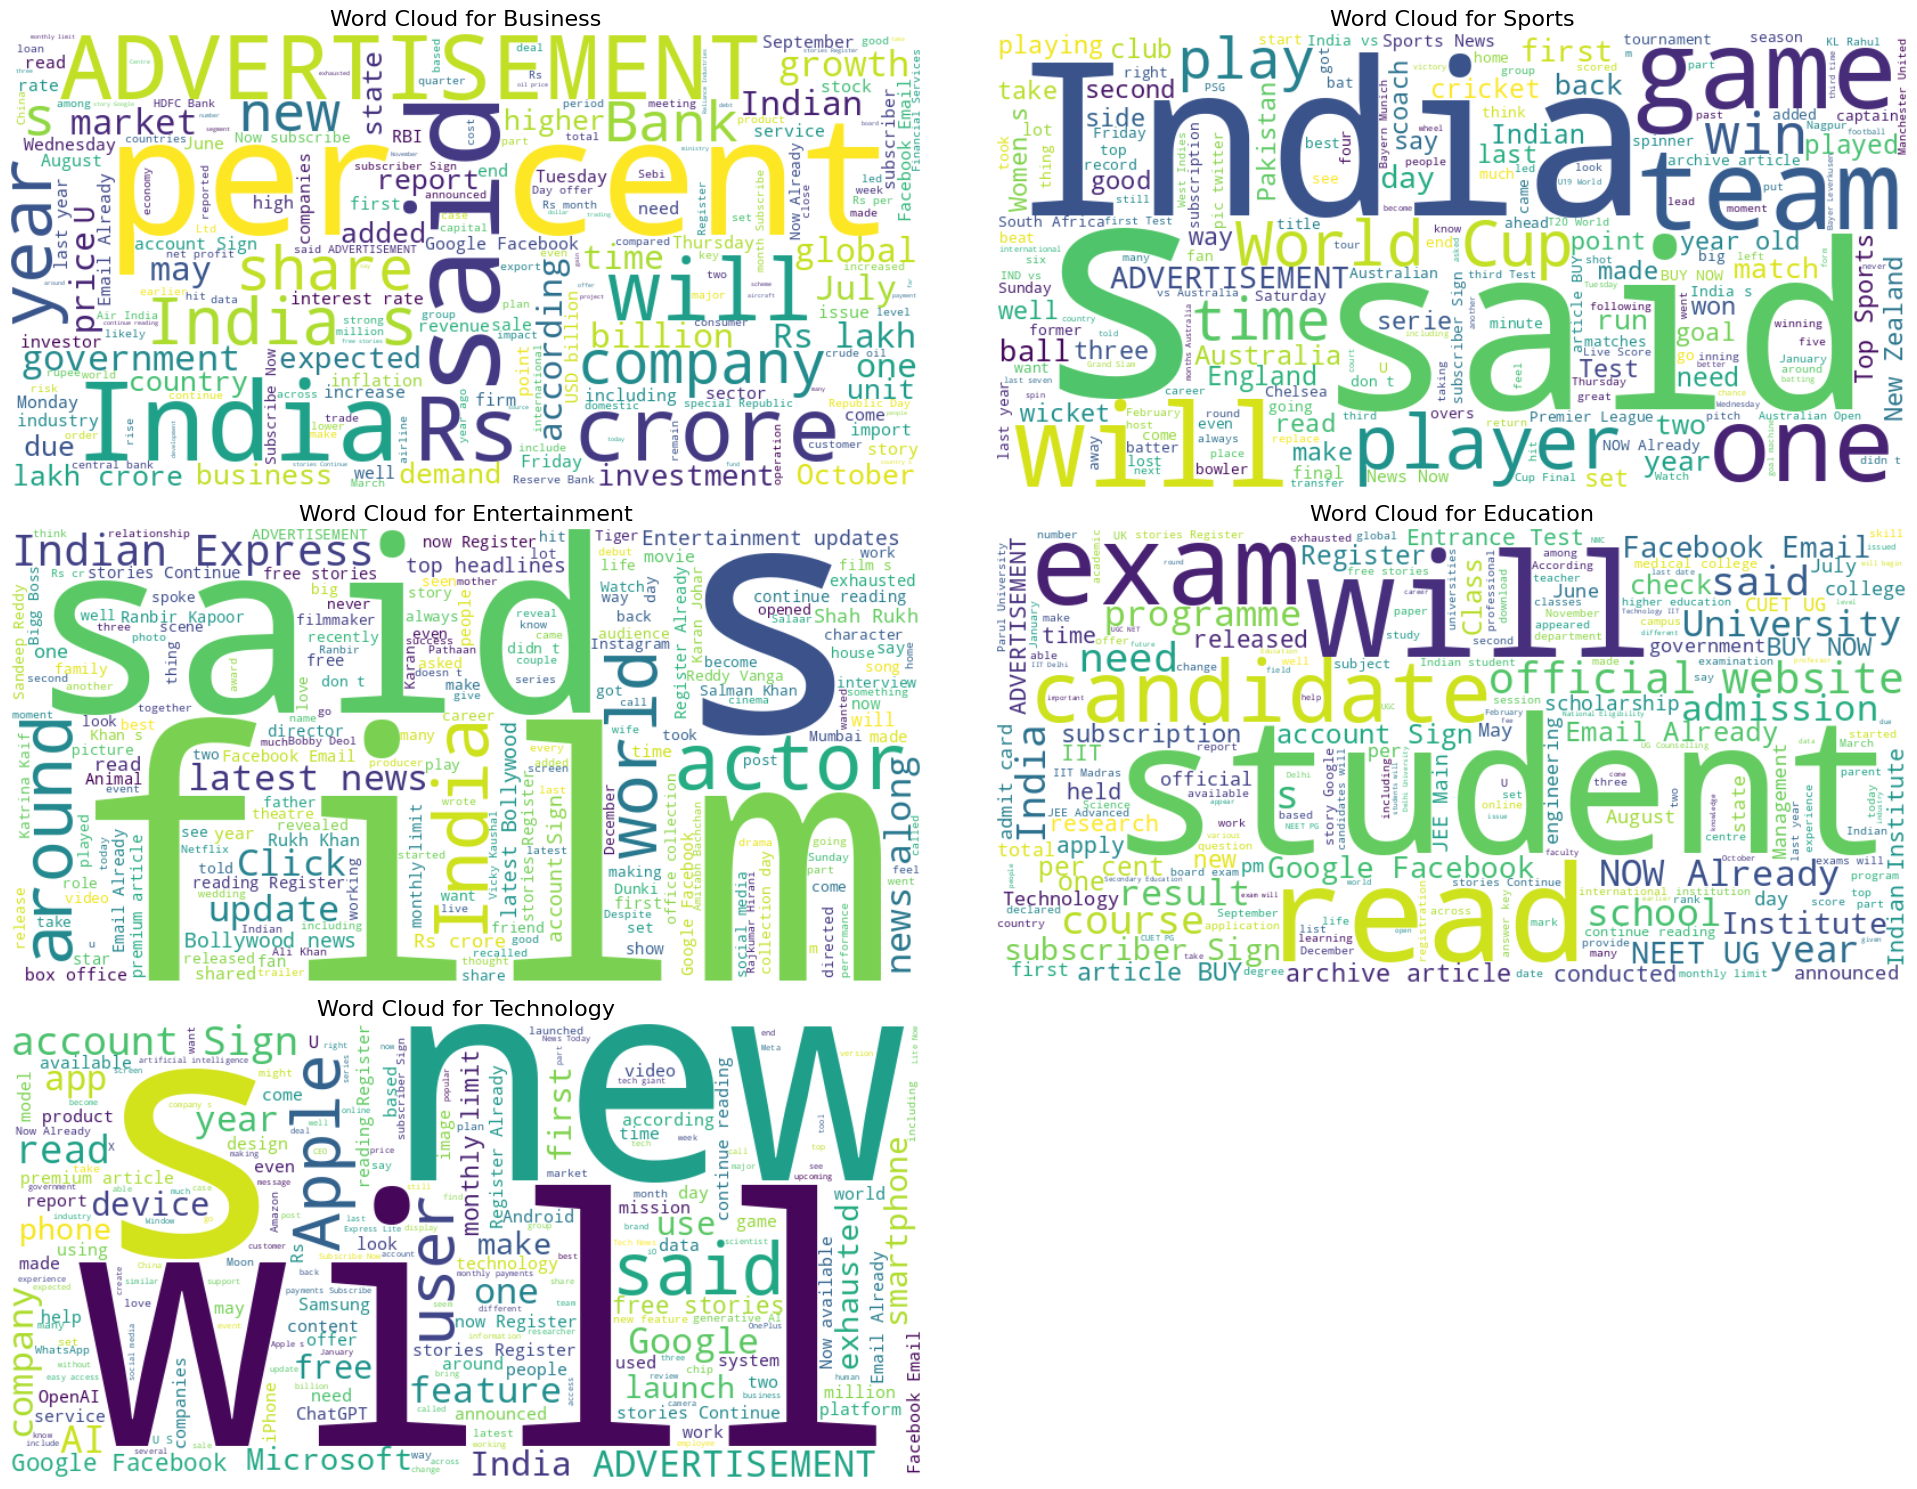

In [31]:
from wordcloud import WordCloud
import math

# Combine 'headlines', 'description', and 'content' into a single 'text' column
train_data['text'] = train_data['headlines'] + ' ' + train_data['description'] + ' ' + train_data['content']

# Generate word clouds for each category
categories = train_data['category'].unique()

# Calculate the number of rows and columns required for the subplots
n_categories = len(categories)
n_cols = 2
n_rows = math.ceil(n_categories / n_cols)

# Create a grid for the word clouds
fig, axs = plt.subplots(n_rows, n_cols, figsize=(20, 5 * n_rows))

# Flatten the 2D grid array for easy iteration
axs = axs.flatten()

for i, category in enumerate(categories):
    category_text = ' '.join(train_data[train_data['category'] == category]['text'])

    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(category_text)

    axs[i].imshow(wordcloud, interpolation='bilinear')
    axs[i].set_title(f'Word Cloud for {category.capitalize()}', fontsize=16)
    axs[i].axis('off')

# Hide any unused subplots
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout()
plt.show()

**Word Cloud Analysis**

A word cloud visually represents word frequency and significance within a text by displaying words in different sizes, quickly conveying the most prominent terms. This tool helps identify patterns and themes in various text categories. Here, we analyze word clouds across different categories to understand their unique characteristics

**Business:**
The Business word cloud emphasizes terms like Share, Company, Bank, and Market, highlighting the focus on economic issues, financial markets, corporate activities, and banking operations. These terms suggest frequent discussions of business strategies and market trends.

**Sports:**
In Sports, words such as World Cup, Game, Player, and Cricket dominate, reflecting the coverage of diverse sports activities and events. The prominence of World Cup signifies its global importance, while Player and Game emphasize individual and team performances.

**Education:**
Words like Exam, Student, University, and Read stand out in the Education category, capturing the essence of learning, examinations, and academic progression. The emphasis on Students and Universities highlights formal education, while Read indicates continuous learning and self-education.

**Entertainment:**
The Entertainment word cloud features terms like Film, Headlines, Actor, and World, illustrating the broad nature of entertainment, including movies, celebrity news, and global trends. Headlines show the media's role in entertainment news, while Actor and Film focus on key industry components.

**Technology:**
In Technology, words such as Apple, Google, Smartphone, and Company reflect the central themes of major tech companies and influential gadgets. The prominence of Smartphone underscores mobile technology's importance, and Apple and Google represent leading tech innovators.

These word clouds reveal patterns in different categories, helping to understand the distinct focuses of Business, Sports, Education, Entertainment, and Technology.


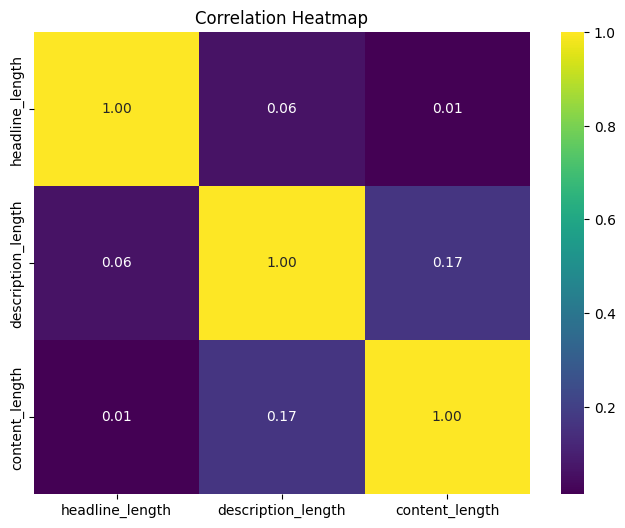

In [32]:
train_data['headline_length'] = train_data['headlines'].apply(len)
train_data['description_length'] = train_data['description'].apply(len)
train_data['content_length'] = train_data['content'].apply(len)

# Creating a correlation matrix
correlation_matrix = train_data[['headline_length', 'description_length', 'content_length']].corr()

# Plotting the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

## Model Training and Evaluation <a id="chapter6"><a>

<div class="alert alert-block alert-success">
  <b>Explanation:</b>  This step involves creating a mathematical or computational model that categorize data into different classes or categories based on input features.
</div>

6.1 Feature extration

This converts raw data into numerical features , thus the process is known as feature extraction. In this case, the raw text data is being transformed into numerical features using a text vectorization technique.


In [33]:
X_vectorized = vect.fit_transform(train_data['text'])
y_train = train_data['encoded_category']

In [34]:
#Getting test data ready
test = test_data['text']
test_vect = vect.transform(test)

6.2 Train test split

The dataset is divided into two parts: one for training the model (the training set) and one for evaluating the model (the test set). The process  ensures that the model's performance is evaluated on data it has not seen during training, thus providing an estimate of how the model will perform on new, unseen data.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y_train,
                                                   test_size=0.2,
                                                   random_state=42)


 5 classification models will be created to accurately classify , provide the highest predictive accuracy or performance on the data. here are the 5 models :

* Logistic regression
* Random forest
* K Nearest Neighbor
* Decision tree
* SVM



#### Model 1: Logistic regression

Logistic Regression is based on a modified linear regression function which is used to predict binary linear separable classes with a single predictor variable. It makes use of a common S-shaped curve known as the logistic function, or commonly known as a sigmoid.

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Initialize the Logistic Regression model with a maximum of 1000 iterations
lg = LogisticRegression(max_iter=1000, multi_class='auto', solver='lbfgs')

# Train the model on the training data
lg.fit(X_train, y_train)

# Predict on the test data
y_pred = lg.predict(X_test)

# Print the classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97       245
           1       0.99      0.99      0.99       274
           2       0.99      0.98      0.99       178
           3       0.99      0.99      0.99       137
           4       0.96      0.97      0.97       270

    accuracy                           0.98      1104
   macro avg       0.98      0.98      0.98      1104
weighted avg       0.98      0.98      0.98      1104



**Insights**

- **Accuracy**: The overall accuracy of the model is 0.98 (or 98%), which indicates that the model correctly classified 98% of the instances in the test set. This is a very high accuracy, suggesting that the model performs well on the dataset.
- **Precision**: All classes have high precision, with Class 1 having the highest precision of 0.99, indicating very few false positives for this class.
- **Recall**: All classes have high recall, with Class 1 and Class 3 having the highest recall of 0.99, indicating very few false negatives for these classes.
- **F1-Score**: The F1-scores are high across all classes, with Class 1 and Class 3 having the highest F1-scores of 0.99, indicating a balanced high performance for these classes.

The macro average shows that the model performs consistently well across all classes without being biased towards any particular class. The weighted average is similar to the macro average, reflecting the model's overall high performance while accounting for the class distribution in the test set. The high accuracy of 98% and the consistent performance across different classes suggest that the model is well-balanced and effective for the classification task at hand.


#### Model 2: Random forest

The Random Forest is a classifier that contains a number of decision trees on various subsets of the given dataset and takes the average to improve the predictive accuracy of that dataset. Instead of relying on one decision tree, the random forest takes the prediction from each tree and based on the majority votes of predictions and it Randomly predicts the final output. Random forests correct for decision trees habit of overfitting to their training set.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

#Import the RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

#Initialize the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

#Train the model using the training data
rf_clf.fit(X_train, y_train)

#Make predictions on the test data
y_pred = rf_clf.predict(X_test)

#Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.92      0.94       245
           1       0.96      0.98      0.97       274
           2       1.00      0.84      0.91       178
           3       0.92      0.88      0.90       137
           4       0.83      0.95      0.89       270

    accuracy                           0.92      1104
   macro avg       0.93      0.91      0.92      1104
weighted avg       0.93      0.92      0.92      1104



**Insights**

- **Accuracy**: The overall accuracy of the model is 0.92 (or 92%), which indicates that the model correctly classified 92% of the instances in the test set. This is a good level of accuracy, but there is room for improvement.
- **Precision**: All classes have relatively high precision, with Class 2 having perfect precision of 1.00, indicating no false positives for this class. However, Class 4 has a lower precision compared to others, indicating more false positives.
- **Recall**: Class 1 has the highest recall of 0.98, indicating very few false negatives for this class. Class 2 has the lowest recall of 0.84, indicating more false negatives.
- **F1-Score**: The F1-scores are generally high, with Class 1 having the highest F1-score of 0.97, indicating a balanced high performance. Class 4 has the lowest F1-score of 0.89, indicating a need for improvement.

The macro average shows that the model performs well across all classes without being biased towards any particular class. The weighted average is similar to the macro average, reflecting the model's overall good performance while accounting for the class distribution in the test set. The model is performing well across all metrics (precision, recall, and F1-score) and for most classes. The overall accuracy of 92% is good, but there are areas for improvement:

**Class 2** has perfect precision but lower recall, indicating that while the model is very precise in identifying Class 2, it misses a significant number of true positives.

**Class 4** has the lowest precision and F1-score, suggesting that the model struggles more with this class compared to others.




#### Model 3: K Nearest Neighbor classifier


The K Nearest Neighbor - KNN classifier assumes that similar things exist in close proximity. It tries to classify an unknown sample based on the known classification of its neighbors. Distance is essential when it comes to making decision boundaries. In principle, this algorithm works by assigning the majority class of the N closest neighbors to the current data point. As such, absolutely no training is required for the algorithm. All we do is choose K (i.e.the number of nearest neighbours to use in the classifier), choose a distance function to calculate proximity and we're good to go.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Initialize the KNN model
knn_clf = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training data
knn_clf.fit(X_train, y_train)

#Make predictions on the test data
y_pred = knn_clf.predict(X_test)

#Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.68      0.78       245
           1       0.68      0.88      0.77       274
           2       0.95      0.71      0.81       178
           3       0.58      0.77      0.66       137
           4       0.72      0.67      0.70       270

    accuracy                           0.74      1104
   macro avg       0.77      0.74      0.74      1104
weighted avg       0.77      0.74      0.75      1104



**Insights**
- **Accuracy**: The overall accuracy of the model is 0.74 (or 74%), which indicates that the model correctly classified 74% of the instances in the test set. This suggests that the model has a moderate level of accuracy.
- **Precision**: Precision is highest for Class 2 (0.95), indicating very few false positives for this class. Class 3 has the lowest precision (0.58), suggesting more false positives for this class.
- **Recall**: Class 1 has the highest recall (0.88), indicating few false negatives for this class. Class 0 has the lowest recall (0.68), indicating more false negatives.
- **F1-Score**: The F1-scores indicate that Class 2 has the best balance of precision and recall (0.81). Class 3 has the lowest F1-score (0.66), suggesting it is the most challenging class for the model.

The macro average shows that the model performs moderately well across all classes without being biased towards any particular class. The weighted average is similar to the macro average, reflecting the model's overall moderate performance while accounting for the class distribution in the test set. The model is performing moderately well across all metrics (precision, recall, and F1-score). However, there are several areas for improvement:

**Class 3** has the lowest precision and F1-score, suggesting that the model struggles significantly with this class.

**Class 0** has the lowest recall, indicating that the model misses a significant number of true positives for this class.




#### MODEL 4: Decision tree

A decision tree is a machine learning model used for classification and regression tasks. It represents decisions and their possible consequences in a tree-like structure of nodes, branches, and leaves. Each internal node represents a decision based on the value of a certain attribute, each branch represents the outcome of that decision, and each leaf node represents a final class label or value.

In [ ]:
from sklearn.tree import DecisionTreeClassifier

#Initialize the Decision Tree model
dt_clf = DecisionTreeClassifier(random_state=42)

#Train the model using the training data
dt_clf.fit(X_train, y_train)

#Make predictions on the test data
y_pred = dt_clf.predict(X_test)

#Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.85       245
           1       0.91      0.94      0.93       274
           2       0.97      0.92      0.94       178
           3       0.88      0.84      0.86       137
           4       0.82      0.85      0.83       270

    accuracy                           0.88      1104
   macro avg       0.89      0.88      0.88      1104
weighted avg       0.88      0.88      0.88      1104



**Insights**
- **Accuracy**: The overall accuracy of the model is 0.88 (or 88%), which indicates that the model correctly classified 88% of the instances in the test set. This suggests that the model has a high level of accuracy.
- **Precision**: Precision is highest for Class 2 (0.97), indicating very few false positives for this class. Class 4 has the lowest precision (0.82), suggesting more false positives for this class.
- **Recall**: Class 1 has the highest recall (0.94), indicating few false negatives for this class. Class 3 has the lowest recall (0.84), indicating more false negatives.
- **F1-Score**: The F1-scores indicate that Class 1 and Class 2 have the best balance of precision and recall (0.93 and 0.94, respectively). Class 4 has the lowest F1-score (0.83), suggesting it is the most challenging class for the model.

The macro average shows that the model performs well across all classes without being biased towards any particular class. The weighted average is similar to the macro average, reflecting the model's overall strong performance while accounting for the class distribution in the test set. The model is performing well across all metrics (precision, recall, and F1-score). However, there are still areas for improvement:

**Class 4** has the lowest precision and F1-score, suggesting that the model struggles more with this class compared to others.

**Class 0** also shows relatively lower performance in terms of recall.

#### MODEL 5: Support Vector Machines(SVM)

Support Vector Machines (SVM) are supervised machine learning models used for classification and regression tasks. They are particularly well-suited for classification of complex datasets where the boundaries between classes are not easily separable.they are versatile, effective in high-dimensional spaces, and robust against overfitting. They provide a clear and often optimal decision boundary, making them suitable for a wide range of applications in various domains.

In [ ]:
from sklearn.svm import SVC

#Initialize the SVM model
svm_clf = SVC(kernel='linear', random_state=42)

#Train the model using the training data
svm_clf.fit(X_train, y_train)

#Make predictions on the test data
y_pred = svm_clf.predict(X_test)

#Evaluate the model's performance
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       245
           1       0.99      0.99      0.99       274
           2       0.99      0.97      0.98       178
           3       0.97      0.98      0.97       137
           4       0.96      0.96      0.96       270

    accuracy                           0.97      1104
   macro avg       0.97      0.97      0.97      1104
weighted avg       0.97      0.97      0.97      1104



**Insights**
- **Accuracy**: The overall accuracy of the model is 0.97 (or 97%), indicating that the model correctly classified 97% of the instances in the test set. This suggests a high level of accuracy.
- **Precision**: All classes have very high precision, with Class 1 and Class 2 having the highest precision (0.99).
- **Recall**: Recall is also very high across all classes, with Class 1 having the highest recall (0.99).
- **F1-Score**: The F1-scores indicate that all classes have a balanced performance of precision and recall, with Class 1 having the highest F1-score (0.99).

The macro average shows that the model performs consistently well across all classes without being biased towards any particular class. The weighted average reflects the model's overall strong performance while accounting for the class distribution in the test set. The model is performing exceptionally well across all metrics (precision, recall, and F1-score). Here are some key points:

The model demonstrates high accuracy, precision, recall, and F1-scores across all classes.
Class 1 and Class 2 show the highest performance in terms of precision, recall, and F1-score.
The macro and weighted averages being identical further reinforce the model's robust and consistent performance.


- The Logistic Regression and SVM models perform the best, with high accuracy and balanced performance across all classes.
- Random Forest and Decision Tree models also show good performance but have room for improvement in certain classes.
- The KNN model has the lowest performance among the five models, indicating a need for significant improvement.

## Model parameters & hyperparameters tunning <a id="chapter8"><a>

<div class="alert alert-block alert-info">
<b>Explanation </b> Fine-tuning model parameters and hyperparameters is a crucial step in the machine learning workflow aimed at optimizing the performance of a model. Here are the primary purposes and benefits of fine-tuning:

* Improve Model Accuracy
* prevent Overfitting and Underfitting
* Enhance Model Efficiency
* Adapt to Specific Data Characteristics
* Improve Interpretability and Usability, and
* Maximize Utility of Hyperparameters.
</di>


**Logistic Regression**

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters:  {'C': 100, 'solver': 'liblinear'}
Best Cross-Validation Score:  0.9762228260869565
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       245
           1       0.99      0.99      0.99       274
           2       0.99      0.99      0.99       178
           3       0.98      0.99      0.99       137
           4       0.97      0.98      0.98       270

    accuracy                           0.98      1104
   macro avg       0.98      0.98      0.98      1104
weighted avg       0.98      0.98      0.98      1104



**Insights**

The tuned Logistic Regression model with C=100 and 'liblinear' solver demonstrates excellent performance with high precision, recall, and F1-scores across all classes. The overall accuracy of 98% on the test set confirms that the model generalizes very well to unseen data. These results indicate that the hyperparameter tuning process successfully optimized.


**Random Forest**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import numpy as np

# Define the parameter distribution
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10, 15],
    'min_samples_leaf': [1, 2, 4, 6],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_search = RandomizedSearchCV(
    RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings sampled
    cv=3,
    scoring='accuracy',
    random_state=42,
    n_jobs=-1  # Use all available cores
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Print the best parameters and the best score
best_params = random_search.best_params_
best_model = random_search.best_estimator_
print("Best Parameters: ", best_params)
print("Best Cross-Validation Score: ", random_search.best_score_)

# Evaluate on the test set
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print("Test Set Classification Report:\n", report)

Best Parameters:  {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': None, 'bootstrap': False}
Best Cross-Validation Score:  0.9399909420289855
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.94      0.95       245
           1       0.97      0.99      0.98       274
           2       1.00      0.92      0.96       178
           3       0.98      0.93      0.96       137
           4       0.89      0.96      0.92       270

    accuracy                           0.95      1104
   macro avg       0.96      0.95      0.95      1104
weighted avg       0.95      0.95      0.95      1104



**Insights**

After tuning the Random Forest classifier with optimized parameters, the model significantly improved its performance across all evaluation metrics. It achieved high precision, indicating few false positives, and strong recall, meaning it effectively identified most relevant instances for each class. The F1-scores, which combine precision and recall, were also impressive across all classes, reflecting a balanced performance. Overall, the model attained an accuracy of 95%, demonstrating its ability to correctly classify a vast majority of instances in the test set. This enhancement underscores the effectiveness of parameter tuning in enhancing the Random Forest's accuracy and reliability for your classification project.

**K Nearest Neighbor classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Initialize GridSearchCV
grid_search = GridSearchCV(KNeighborsClassifier(), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters:  {'algorithm': 'auto', 'n_neighbors': 9, 'p': 2, 'weights': 'distance'}
Best Cross-Validation Score:  0.7610960144927535
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.65      0.77       245
           1       0.71      0.88      0.79       274
           2       0.98      0.70      0.82       178
           3       0.57      0.82      0.67       137
           4       0.69      0.70      0.70       270

    accuracy                           0.75      1104
   macro avg       0.78      0.75      0.75      1104
weighted avg       0.79      0.75      0.75      1104



**Insights**

After tuning the K Nearest Neighbors (KNN) classifier with specific parameters, the model showed varied performance across different classes. It achieved high precision for Class 2 and decent recall for Classes 1, 3, and 4. However, precision was lower for Classes 1 and 3, indicating more false positives, and recall was weaker for Class 0, suggesting it missed a significant number of true positives. The overall accuracy of the tuned KNN model was 75%, indicating moderate performance compared to other models like Random Forest or SVM. Further optimization is recommended to improve its consistency and accuracy across all classes in your classification project.

**Decision Tree**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=3, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters:  {'max_depth': 30, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best Cross-Validation Score:  0.8709239130434782
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       245
           1       0.92      0.92      0.92       274
           2       0.97      0.91      0.94       178
           3       0.86      0.83      0.85       137
           4       0.79      0.87      0.83       270

    accuracy                           0.87      1104
   macro avg       0.88      0.87      0.87      1104
weighted avg       0.88      0.87      0.87      1104



**Insights**

The Decision Tree classifier, after parameter tuning, demonstrated improved accuracy and balanced performance across multiple metrics. With high precision, recall, and F1-scores across most classes, the model effectively identifies and classifies instances within the dataset. Class 2 showed particularly high precision and recall, while Class 4 demonstrated slightly lower precision but still maintained good overall performance. Overall, the tuned Decision Tree model proves to be a robust choice for your classification task, achieving significant enhancement in accuracy compared to its default configuration.

**Support Vector Machine**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report

# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1],
    'kernel': ['linear', 'rbf', 'poly']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(SVC(), param_grid, cv=5, scoring='accuracy')

# Fit the model
grid_search.fit(X_train, y_train)

# Print the best parameters and the best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: ", grid_search.best_score_)

# Evaluate on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Test Set Classification Report:\n", classification_report(y_test, y_pred))

Best Parameters:  {'C': 0.1, 'gamma': 0.01, 'kernel': 'linear'}
Best Cross-Validation Score:  0.9685235507246377
Test Set Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.96      0.96       245
           1       0.99      0.99      0.99       274
           2       0.99      0.97      0.98       178
           3       0.97      0.98      0.97       137
           4       0.96      0.96      0.96       270

    accuracy                           0.97      1104
   macro avg       0.97      0.97      0.97      1104
weighted avg       0.97      0.97      0.97      1104



**Insights**

The tuned SVM model with a linear kernel, C=0.1 and gamma=0.01 demonstrates excellent performance with high precision, recall, and F1-scores across all classes. The overall accuracy of 97% on the test set confirms that the model generalizes well to unseen data. These results indicate that the hyperparameter tuning process successfully optimized the SVM model for this particular classification task.



**Model Comparisons**

In [ ]:
from tabulate import tabulate

# Define the data
data = [
    ['Logistic Regression', 0.98],
    ['Random Forest', 0.92],
    ['KNN', 0.74],
    ['Decision Tree', 0.88],
    ['SVM', 0.97]
]

# Sort data based on accuracy (descending order)
data_sorted = sorted(data, key=lambda x: x[1], reverse=True)

# Define headers for the table
headers = ['Model', 'Accuracy']

# Print the table
print(tabulate(data_sorted, headers=headers, tablefmt='fancy_grid'))

╒═════════════════════╤════════════╕
│ Model               │   Accuracy │
╞═════════════════════╪════════════╡
│ Logistic Regression │       0.98 │
├─────────────────────┼────────────┤
│ SVM                 │       0.97 │
├─────────────────────┼────────────┤
│ Random Forest       │       0.92 │
├─────────────────────┼────────────┤
│ Decision Tree       │       0.88 │
├─────────────────────┼────────────┤
│ KNN                 │       0.74 │
╘═════════════════════╧════════════╛


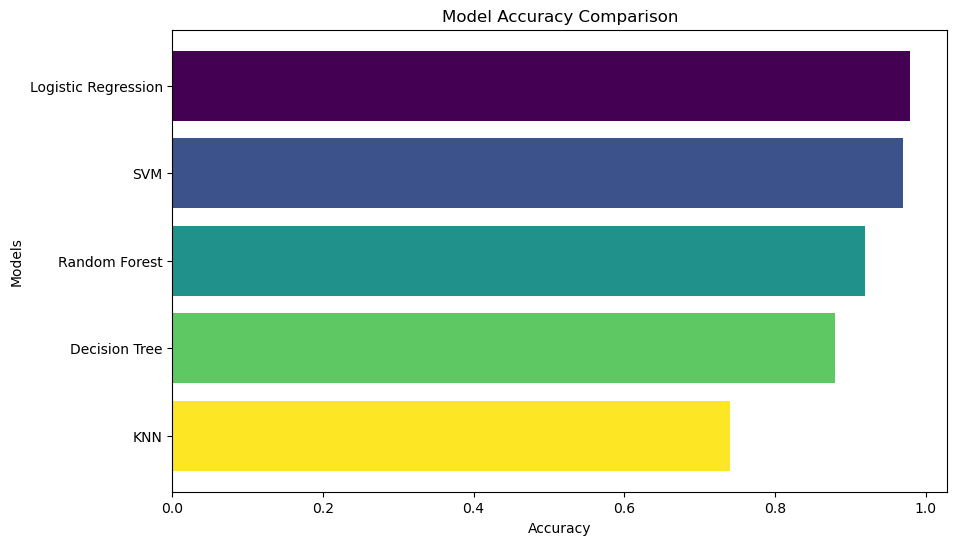

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.cm import viridis

# Define the models and accuracies
models = ['Logistic Regression', 'Random Forest', 'KNN', 'Decision Tree', 'SVM']
accuracies = [0.98, 0.92, 0.74, 0.88, 0.97]

# Sort models and accuracies based on accuracies (descending order)
models_sorted, accuracies_sorted = zip(*sorted(zip(models, accuracies), key=lambda x: x[1], reverse=True))

# Get colors from the viridis colormap
viridis_colors = viridis(np.linspace(0, 1, len(models_sorted)))

# Plot the horizontal bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(models_sorted, accuracies_sorted, color=viridis_colors)
plt.xlabel('Accuracy')
plt.ylabel('Models')
plt.title('Model Accuracy Comparison')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest accuracy at the top

plt.show()

**Insights**

Among the five models evaluated, Logistic Regression and SVM stand out with the highest accuracies of 98% and 97%, respectively, demonstrating excellent performance and balanced, robust classification across all classes. The Random Forest and Decision Tree models also perform well, with accuracies of 92% and 88%, respectively, but they exhibit some room for improvement, particularly in reducing false negatives for certain classes. The KNN model, with an accuracy of 74%, has the lowest performance, indicating a need for significant improvements. Overall, Logistic Regression and SVM are the top performers, showcasing superior effectiveness in this classification task.

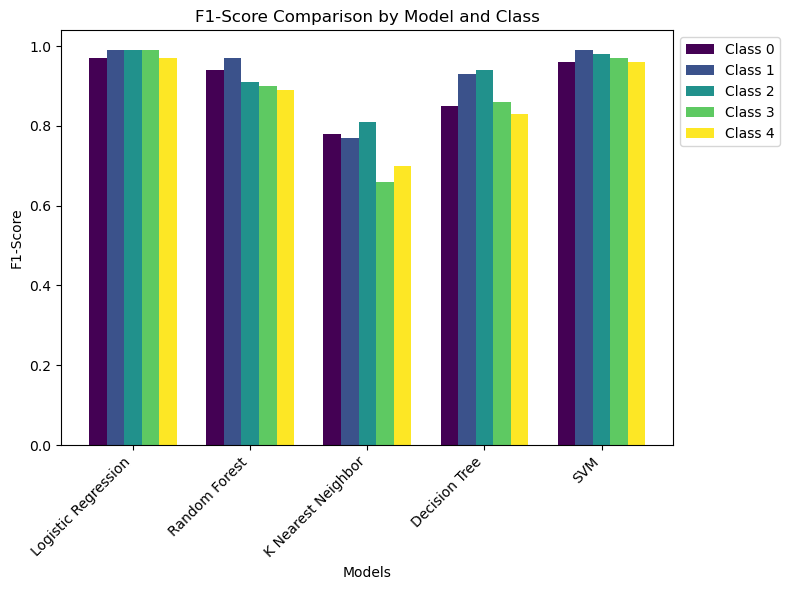

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Data for each model
metrics = {
    'Logistic Regression': {
        'f1_score': [0.97, 0.99, 0.99, 0.99, 0.97]
    },
    'Random Forest': {
        'f1_score': [0.94, 0.97, 0.91, 0.90, 0.89]
    },
    'K Nearest Neighbor': {
        'f1_score': [0.78, 0.77, 0.81, 0.66, 0.70]
    },
    'Decision Tree': {
        'f1_score': [0.85, 0.93, 0.94, 0.86, 0.83]
    },
    'SVM': {
        'f1_score': [0.96, 0.99, 0.98, 0.97, 0.96]
    }
}

models = list(metrics.keys())
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
x = np.arange(len(models))
width = 0.15  # width of the bars

fig, ax = plt.subplots(figsize=(8, 6))

# Define the positions for each bar
positions = {
    'Class 0': x - 2*width,
    'Class 1': x - width,
    'Class 2': x,
    'Class 3': x + width,
    'Class 4': x + 2*width
}

# Get colors from the viridis colormap
viridis_colors = viridis(np.linspace(0, 1, len(classes)))

for i, (cls, color) in enumerate(zip(classes, viridis_colors)):
    f1_scores = [metrics[model]['f1_score'][i] for model in models]

    ax.bar(positions[cls], f1_scores, width, label=cls, color=color)

# Adding labels and title
ax.set_xlabel('Models')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Score Comparison by Model and Class')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=45, ha='right')  # Rotate and align x labels

# Move the legend outside the plot
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

**Model Selection using F1-Scores**

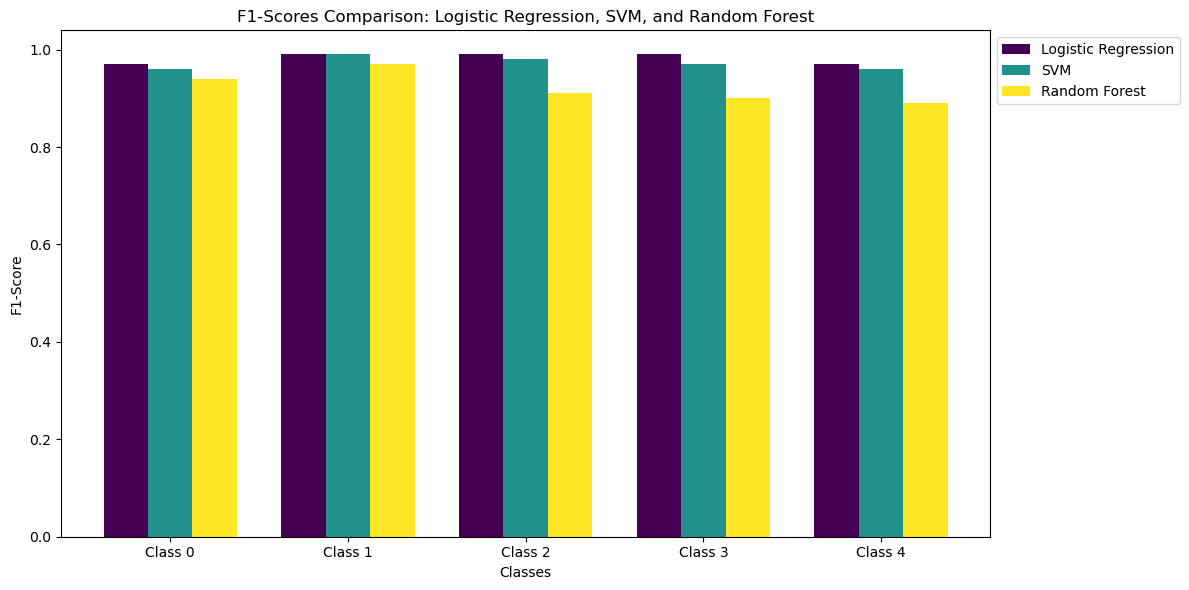

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.cm import viridis

# Data for Logistic Regression, SVM, and Random Forest models
logistic_regression_f1_scores = [0.97, 0.99, 0.99, 0.99, 0.97]
svm_f1_scores = [0.96, 0.99, 0.98, 0.97, 0.96]
random_forest_f1_scores = [0.94, 0.97, 0.91, 0.90, 0.89]
classes = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
x = np.arange(len(classes))
width = 0.25  # width of the bars

fig, ax = plt.subplots(figsize=(12, 6))

# Viridis colormap for colors of models
viridis_colors = viridis(np.linspace(0, 1, 3))  # 3 colors for 3 models

# Plotting the F1 scores for Logistic Regression
bars_lr = ax.bar(x - width, logistic_regression_f1_scores, width, label='Logistic Regression', color=viridis_colors[0])

# Plotting the F1 scores for SVM
bars_svm = ax.bar(x, svm_f1_scores, width, label='SVM', color=viridis_colors[1])

# Plotting the F1 scores for Random Forest
bars_rf = ax.bar(x + width, random_forest_f1_scores, width, label='Random Forest', color=viridis_colors[2])

# Adding labels and title
ax.set_xlabel('Classes')
ax.set_ylabel('F1-Score')
ax.set_title('F1-Scores Comparison: Logistic Regression, SVM, and Random Forest')
ax.set_xticks(x)
ax.set_xticklabels(classes)

# Function to add value labels on top of each bar
def add_value_labels(bars):
    for bar in bars:
        yval = bar.get_height()

# Adding value labels for Logistic Regression
add_value_labels(bars_lr)

# Adding value labels for SVM
add_value_labels(bars_svm)

# Adding value labels for Random Forest
add_value_labels(bars_rf)

# Moving the legend outside of the graph
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

**Insights**

Logistic Regression and SVM exhibit superior performance with very high F1-scores across all classes, reflecting their balanced and effective classification capabilities. Logistic Regression achieves near-perfect F1-scores of 0.99 for Classes 1, 2, and 3, with overall macro and weighted averages of 0.98. Similarly, SVM demonstrates excellent F1-scores, with Class 1 reaching 0.99 and overall averages of 0.97, indicating strong precision and recall. In comparison, the Random Forest model has good F1-scores, with Class 1 achieving 0.97, but shows variability with a lower score of 0.89 for Class 4 and overall averages of 0.92. This suggests that while Random Forest performs well, it is not as consistent or robust as Logistic Regression and SVM.

## Conclusion <a id="chapter9"><a>

In this project, we embarked on a journey to develop a machine learning model capable of classifying news articles into predefined categories. The main aim was to improve content organization, enhance reader satisfaction, and increase operational efficiency for news outlets. We used various machine learning models, including Logistic Regression, Random Forest, K-Nearest Neighbors (KNN), Decision Tree, and Support Vector Machine (SVM), to achieve this goal.

After evaluating the performance of all models, we found that the Logistic Regression and SVM models outperformed the others, achieving the highest accuracy and balanced performance across all categories. Both models demonstrated robustness and reliability in classifying news articles into predefined categories.

The hyperparameter tuning process played a crucial role in optimizing these models, ensuring that they generalized well to unseen data. The high performance of these models suggests that they are well-suited for deployment in a real-world application where accurate and efficient news article classification is essential.